# **Import Library yang dibutuhkan**

In [104]:
# Mengimport Library yang dibutuhkan
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# **Load Dataset**

In [19]:
# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/Dataset Ulasan Google Play/scrapped_data_PermenKomik_1.csv")
df.head()

,userName,score,at,content
0,marcell gaming,5,2024-05-28 02:04:37,Bagus dan mantap👍🏾👍🏾
1,patek cok,5,2024-05-28 02:03:46,Bagus
2,Dewi Delpina Pardede,5,2024-05-28 02:02:05,Bagusss
3,Abdul Munzil karim,5,2024-05-28 02:02:03,Mantap jiwa hhh
4,Rudi Santoso,5,2024-05-28 01:58:42,Baguss tpi komikk mantappp


In [20]:
# Menampilkan Column Content, Username, dan at.
df = df[['content', 'userName', 'at']]
df

,content,userName,at
0,Bagus dan mantap👍🏾👍🏾,marcell gaming,2024-05-28 02:04:37
1,Bagus,patek cok,2024-05-28 02:03:46
2,Bagusss,Dewi Delpina Pardede,2024-05-28 02:02:05
3,Mantap jiwa hhh,Abdul Munzil karim,2024-05-28 02:02:03
4,Baguss tpi komikk mantappp,Rudi Santoso,2024-05-28 01:58:42
...,...,...,...
194,goid,Andra Effendi,2024-05-27 17:28:09
195,Sangat bagus,Irhan Ab,2024-05-27 17:27:54
196,Mayan,Jar Jar2,2024-05-27 17:27:32
197,Bagus,Zahrul Wildan,2024-05-27 17:26:18


In [21]:
# Memberikan Informasi terkait Dataset yang digunakan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   content   199 non-null    object
 1   userName  199 non-null    object
 2   at        199 non-null    object
dtypes: object(3)
memory usage: 4.8+ KB


In [22]:
# Menghasilkan statistik deskriptif data dalam Pandas DataFrame atau Series.
df.describe()

,content,userName,at
count,199,199,199
unique,152,199,198
top,Bagus,marcell gaming,2024-05-27 17:57:35
freq,18,1,2


# **Cleaning Data**

In [23]:
# Mengetahui jumlah berapa baris dan kolom.
df.shape

(199, 3)

In [24]:
# Menghapus data yang duplicate
df = df.drop_duplicates(subset=['content'])

In [25]:
# Mengecek data yang duplikat
df.duplicated().sum()

0

In [26]:
# Menghapus data yang kosong
df = df.dropna()

In [27]:
# Memastikan tidak ada missing value yang tersisa.
df.isnull().sum()

content     0
userName    0
at          0
dtype: int64

In [28]:
df.shape

(152, 3)

In [29]:
def clean_review_text(text): # Membuat Fungsi Cleaning Text
  text = re.sub(r"@[A-Za-z0-9_]+", "", text) # Menghapus Mention
  text = re.sub(r"#\w+", "", text) # Menghapus Hastag
  text = re.sub(r"https?://\S+", "", text) # Menghapus URL

  text = re.sub(r"[^A-Za-z0-9 ]", "", text) # Menghapus Karakter Non Alphanumeric
  text = re.sub(r"\s+", " ", text).strip() # Menghapus Spasi Berlebih
  text = re.sub(r"[0-9]+", "", text)

  return text

In [30]:
def remove_emojis(data): # Membuat Fungsi Hapus Emoji
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [31]:
# Mengaplikasikan fungsi yang sudah dibuat kedalam column 'content'
df['content'] = df['content'].apply(clean_review_text, remove_emojis).str.lower()
df

,content,userName,at
0,bagus dan mantap,marcell gaming,2024-05-28 02:04:37
1,bagus,patek cok,2024-05-28 02:03:46
2,bagusss,Dewi Delpina Pardede,2024-05-28 02:02:05
3,mantap jiwa hhh,Abdul Munzil karim,2024-05-28 02:02:03
4,baguss tpi komikk mantappp,Rudi Santoso,2024-05-28 01:58:42
...,...,...,...
191,bagussssse,Muhammad Fahmi,2024-05-27 17:29:22
193,komicnya bagus,Susan Santi,2024-05-27 17:28:40
194,goid,Andra Effendi,2024-05-27 17:28:09
196,mayan,Jar Jar2,2024-05-27 17:27:32


# **Preprocessing**


1.   Normalisasi
2.   Stopword
3.   Tokenize
4.   Steamming



In [32]:
# 1. Normalisasi

norm = {"yg" : "yang",
        "nyri" : "nyari",
        "cvvk" : "",
        "aplk" : "aplikasi",
        "non ton": "nonton",
        "jg" : "juga",
        "jd" : "jadi",
        "klo" : "kalau",
        "gak" : "tidak",
        "woila" : "",
        "kok" : "kenapa",
        "knp" : "kenapa",
        "apk" : "aplikasi",
        "bgt" : "sangat",
        "ntah" : "tidak tahu",
        "mendem" : "tertekan",
        "ngasih" : "memberi",
        "kek" : "seperti",
        "sepertiurangan" : "",
        "pw" : "paswword",
        "gema" : "game",
        "jgn" : "jangan",
        "gajelas" : "tidak jelas",
        "pantes" : "pantas",
        "aelah" : "",
        "geratis" : "gratis",
        "rawwwwwwwwwwwwwrrrrrrrrr" : "",
        "doanload" : "download",
        "ngebag" : "ngebug",
        "ttk" : "Tiktok",
        "elor" : "error",
        "aee kos www www sz" : "",
        "nasdgm" : "",
        "sekalisaya" : "sekali saya",
        "pcr" : "pacar",
        "ttp" : "tetap",
        "007" : ""
       }

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['content'] = df['content'].apply(lambda x: normalisasi(x))
df

,content,userName,at
0,bagus dan mantap,marcell gaming,2024-05-28 02:04:37
1,bagus,patek cok,2024-05-28 02:03:46
2,bagusss,Dewi Delpina Pardede,2024-05-28 02:02:05
3,mantap jiwa hhh,Abdul Munzil karim,2024-05-28 02:02:03
4,baguss tpi komikk mantappp,Rudi Santoso,2024-05-28 01:58:42
...,...,...,...
191,bagussssse,Muhammad Fahmi,2024-05-27 17:29:22
193,komicnya bagus,Susan Santi,2024-05-27 17:28:40
194,goid,Andra Effendi,2024-05-27 17:28:09
196,mayan,Jar Jar2,2024-05-27 17:27:32


In [33]:
# Menginstall Library Sastrawi
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.4 MB/s eta 0:00:00


In [34]:
# 2. Stopwords

import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = []

stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopwords(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['content'] = df['content'].apply(lambda x: stopwords(x))
df

,content,userName,at
0,bagus mantap,marcell gaming,2024-05-28 02:04:37
1,bagus,patek cok,2024-05-28 02:03:46
2,bagusss,Dewi Delpina Pardede,2024-05-28 02:02:05
3,mantap jiwa hhh,Abdul Munzil karim,2024-05-28 02:02:03
4,baguss tpi komikk mantappp,Rudi Santoso,2024-05-28 01:58:42
...,...,...,...
191,bagussssse,Muhammad Fahmi,2024-05-27 17:29:22
193,komicnya bagus,Susan Santi,2024-05-27 17:28:40
194,goid,Andra Effendi,2024-05-27 17:28:09
196,mayan,Jar Jar2,2024-05-27 17:27:32


In [35]:
# Tokenize
tokenized = df['content'].apply(lambda x:x.split())
tokenized

0                                        [bagus, mantap]
1                                                [bagus]
2                                              [bagusss]
3                                    [mantap, jiwa, hhh]
4                        [baguss, tpi, komikk, mantappp]
                             ...                        
191                                         [bagussssse]
193                                    [komicnya, bagus]
194                                               [goid]
196                                              [mayan]
198    [aplikasi, sangat, recommended, pecinta, komik...
Name: content, Length: 152, dtype: object

In [36]:
# # Steamming

# from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# def stemming(text_cleaning):
#     factory = StemmerFactory()
#     stemmer = factory.create_stemmer()
#     stemmed_words = [stemmer.stem(w) for w in text_cleaning]
#     return " ".join(stemmed_words)

# tokenized = tokenized.apply(stemming)

# tokenized.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_PermenKomik_1.csv', index = False)


In [37]:
df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_PermenKomik_1.csv', encoding = 'latin1')
df_clean

,content
0,bagus mantap
1,bagus
2,bagusss
3,mantap jiwa hhh
4,baguss tpi komikk mantappp
...,...
147,bagussssse
148,komicnya bagus
149,goid
150,mayan


# **Translate**

In [38]:
# # Menginstall Library easynmt
# !pip install -U easynmt

In [39]:
# import pandas as pd
# from easynmt import EasyNMT

In [40]:
# df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_PermenKomik_1.csv', encoding='latin1')

In [41]:
# source_lang = 'id'  # Replace with the source language of your data
# target_lang = 'en'  # Replace with the target language

In [42]:
# model = EasyNMT('opus-mt')  # You can choose a different model name here

In [43]:
# df2 = df_clean.fillna(method = 'pad')
# df2

In [44]:
# df2['content_en'] = df2['content'].apply(lambda x: model.translate(x, source_lang=source_lang, target_lang=target_lang))
# df2.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_PermenKomik_1.csv')

In [45]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_PermenKomik_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,bagus mantap,That's good. That's good. That's good.
1,1,bagus,Good.
2,2,bagusss,goodsss
3,3,mantap jiwa hhh,"fontcolor="" # FFFF00""soul fontcolor="" # hhh"
4,4,baguss tpi komikk mantappp,That's good. But comics are great.
...,...,...,...
147,147,bagussssse,goodssse
148,148,komicnya bagus,It's good.
149,149,goid,gold
150,150,mayan,mayan


# **Labeling**

In [46]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_PermenKomik_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,bagus mantap,That's good. That's good. That's good.
1,1,bagus,Good.
2,2,bagusss,goodsss
3,3,mantap jiwa hhh,"fontcolor="" # FFFF00""soul fontcolor="" # hhh"
4,4,baguss tpi komikk mantappp,That's good. But comics are great.
...,...,...,...
147,147,bagussssse,goodssse
148,148,komicnya bagus,It's good.
149,149,goid,gold
150,150,mayan,mayan


In [47]:
# Menginstall Library Text-Blob, Worldcould, dan NLTK
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

In [48]:
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [49]:
data_review = list(df2['content_en'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, review in enumerate(data_review):
    analysis = TextBlob(str(review))
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append("Positif")
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append("Netral")
    else:
        total_negatif += 1
        status.append("Negatif")

    total += 1

print(f"Hasil Analisis Data :\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}")
print(f"\nTotal Data Seluruhnya : {total}")

Hasil Analisis Data :
Positif = 115
Netral = 35
Negatif = 2

Total Data Seluruhnya : 152


In [50]:
df2['sentimen'] = status
df2

,Unnamed: 0,content,content_en,sentimen
0,0,bagus mantap,That's good. That's good. That's good.,Positif
1,1,bagus,Good.,Positif
2,2,bagusss,goodsss,Netral
3,3,mantap jiwa hhh,"fontcolor="" # FFFF00""soul fontcolor="" # hhh",Netral
4,4,baguss tpi komikk mantappp,That's good. But comics are great.,Positif
...,...,...,...,...
147,147,bagussssse,goodssse,Netral
148,148,komicnya bagus,It's good.,Positif
149,149,goid,gold,Netral
150,150,mayan,mayan,Netral


In [51]:
# Menghapus Colum Unnamed: 0
data = df2.drop(columns=['Unnamed: 0'])
data

,content,content_en,sentimen
0,bagus mantap,That's good. That's good. That's good.,Positif
1,bagus,Good.,Positif
2,bagusss,goodsss,Netral
3,mantap jiwa hhh,"fontcolor="" # FFFF00""soul fontcolor="" # hhh",Netral
4,baguss tpi komikk mantappp,That's good. But comics are great.,Positif
...,...,...,...
147,bagussssse,goodssse,Netral
148,komicnya bagus,It's good.,Positif
149,goid,gold,Netral
150,mayan,mayan,Netral


# **Visualisasi**


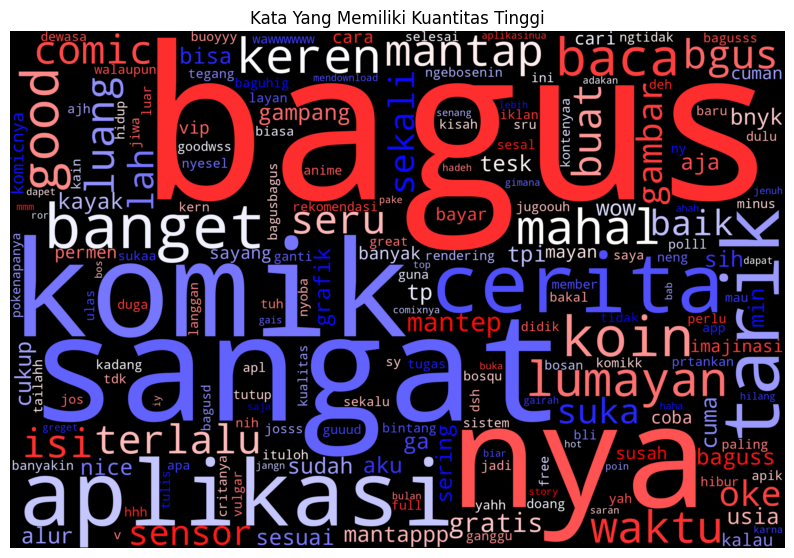

In [52]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Kata Yang Memiliki Kuantitas Tinggi')
    plt.axis('off')
    plt.show()

all_words = ' '.join([reviews for reviews in df2['content']])

wordcloud = WordCloud(width=3000,
                      height=2000,
                      random_state=3,
                      background_color='black',
                      colormap='bwr',
                      collocations=False,
                      stopwords=STOPWORDS).generate(all_words)

plot_cloud(wordcloud)


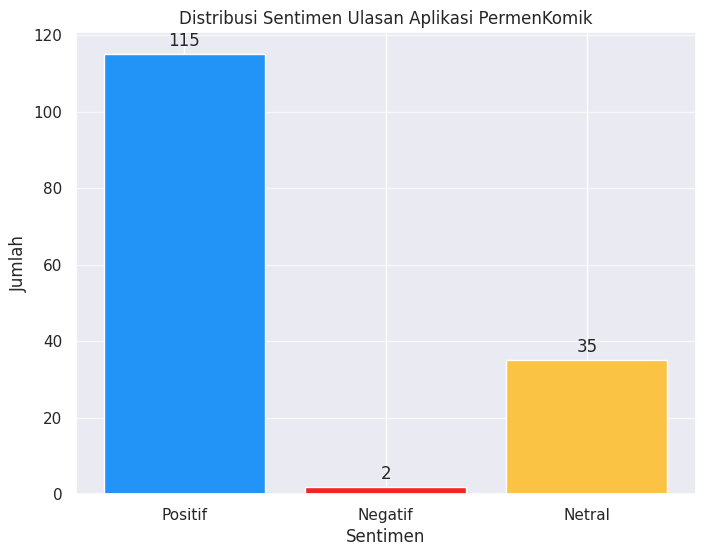

In [53]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi PermenKomik")


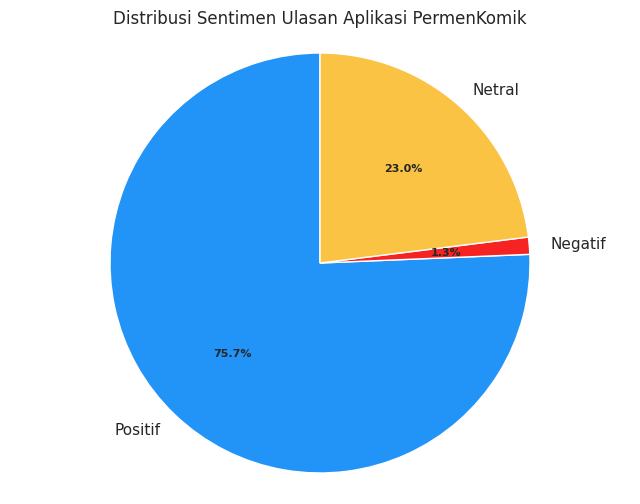

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi PermenKomik")

In [55]:
# Menghapus Sentimen Netral
data = data[data['sentimen'] != 'Netral']
data

,content,content_en,sentimen
0,bagus mantap,That's good. That's good. That's good.,Positif
1,bagus,Good.,Positif
4,baguss tpi komikk mantappp,That's good. But comics are great.,Positif
5,keren,Cool.,Positif
6,bagus sekali komik,Very good comics.,Positif
...,...,...,...
142,coba gratis lebih greget,Try free more grget,Positif
143,sayang nya top up,Her baby top up.,Positif
145,aplikasi bagus yang suka baca komik,Nice comic book-reading app.,Positif
148,komicnya bagus,It's good.,Positif


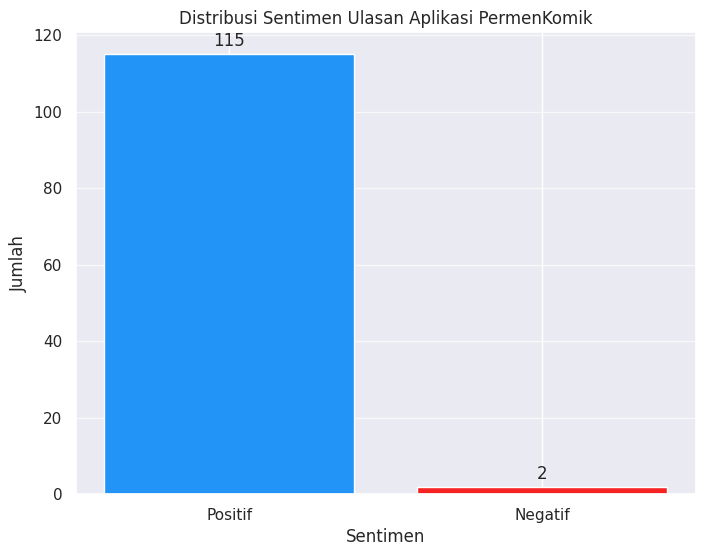

In [56]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi PermenKomik")


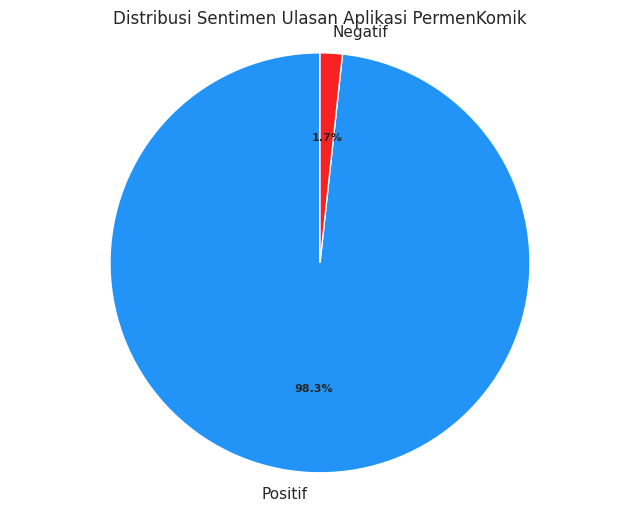

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi PermenKomik")

In [58]:
data = data.replace({'Positif':1, 'Negatif':0})
data

,content,content_en,sentimen
0,bagus mantap,That's good. That's good. That's good.,1
1,bagus,Good.,1
4,baguss tpi komikk mantappp,That's good. But comics are great.,1
5,keren,Cool.,1
6,bagus sekali komik,Very good comics.,1
...,...,...,...
142,coba gratis lebih greget,Try free more grget,1
143,sayang nya top up,Her baby top up.,1
145,aplikasi bagus yang suka baca komik,Nice comic book-reading app.,1
148,komicnya bagus,It's good.,1


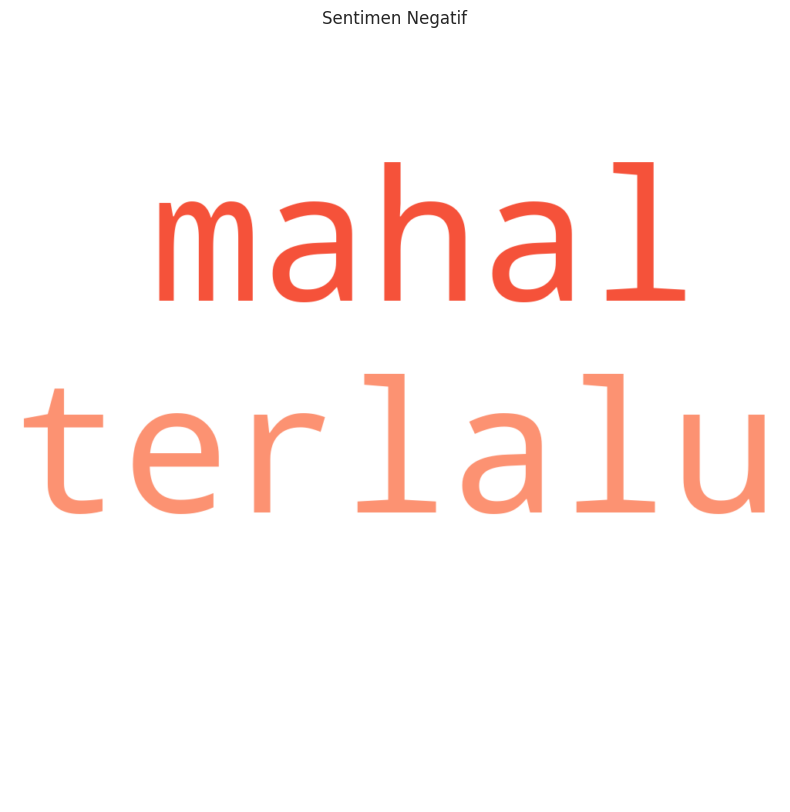

In [59]:
# Visualisasi Wordcould Positif & Negatif

data_negatif = data[data['sentimen'] == 0]
data_positif = data[data['sentimen'] == 1]

all_words = ' '.join([reviews for reviews in data_negatif['content']])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Negatif")
plt.margins(x=0, y=0)
plt.show()

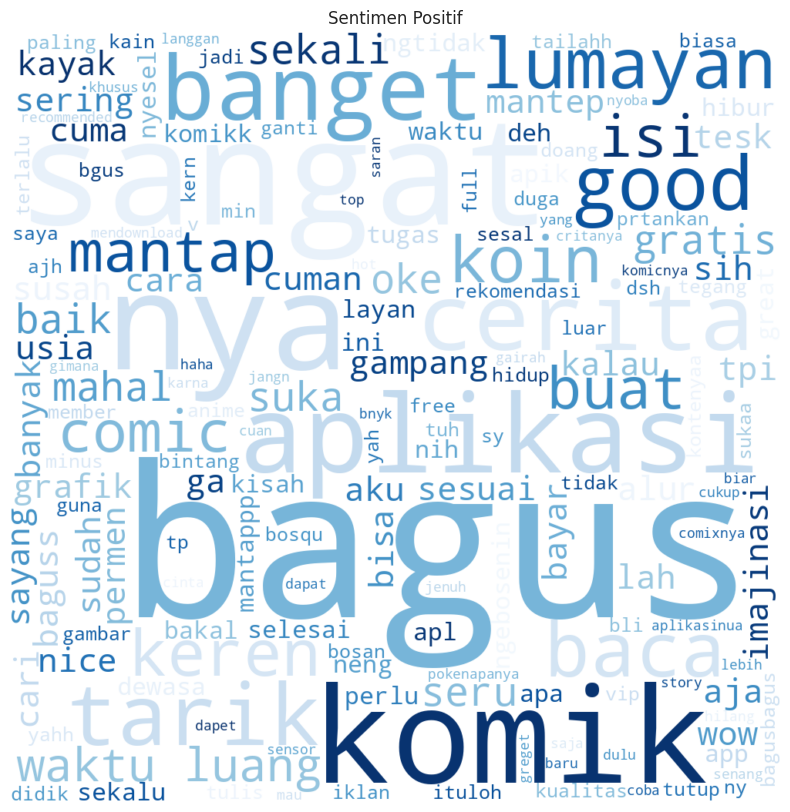

In [60]:
all_words = ' '.join([reviews for reviews in data_positif['content']])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Positif")
plt.margins(x=0, y=0)
plt.show()

In [61]:
# Menghitung Jumlah Sentimen Negatif dan Positif
data['sentimen'].value_counts()

sentimen
1    115
0      2
Name: count, dtype: int64

# **Data Preparation & Modeling**

In [62]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.metrics import confusion_matrix

In [97]:
# Memisahkan data menjadi data latih dan data uji
X = data['content']
y = data['sentimen']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

In [98]:
X_train

45                                       bagus apl nya
20                                 aplikasi ini dewasa
79                        bagus tpi banyak tutup tulis
44                                       lumayan bagus
68                           permen komik sangat bagus
                            ...                       
134                            komik keren banget haha
16                                                baik
113         sangat tarik kalau jangn banyak sensor nya
64     bagus gambar tp sy ga free bli kain jadi member
128                 cara biar dapet gratis baca gimana
Name: content, Length: 70, dtype: object

In [99]:
# Menggunakan TfidfVectorizer untuk mengubah teks menjadi fitur numerik
vectorizer = TfidfVectorizer()
vectorizer.fit(X_train)


TfidfVectorizer()

In [100]:
X_train_vec = vectorizer.transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [101]:
X_train_vec.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [102]:
for c in [0.01, 0.05, 0.25, 0.5, 0.75, 1]:
  svm = LinearSVC(C=c)
  svm.fit(X_train_vec, y_train)
  print('Akurasi untuk c = %s: %s' %(c, accuracy_score(y_test, svm.predict(X_test_vec))))

Akurasi untuk c = 0.01: 1.0
Akurasi untuk c = 0.05: 1.0
Akurasi untuk c = 0.25: 1.0
Akurasi untuk c = 0.5: 1.0
Akurasi untuk c = 0.75: 1.0
Akurasi untuk c = 1: 1.0


In [105]:
linear_svc = LinearSVC(C = 1.0)
calibrated_svc = CalibratedClassifierCV(linear_svc)
calibrated_svc.fit(X_train_vec, y_train)

CalibratedClassifierCV(estimator=LinearSVC())

In [106]:
print('Accuracy score model final: %s ' %accuracy_score(y_test, svm.predict(X_test_vec)))

Accuracy score model final: 1.0 


In [107]:
y_pred = svm.predict(X_test_vec)
print('Accuracy Of SVM Classfier On Test Set: {:.2f}' .format(svm.score(X_test_vec, y_test)))

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(classification_report(y_test, y_pred))


Accuracy Of SVM Classfier On Test Set: 1.00
[[47]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        47

    accuracy                           1.00        47
   macro avg       1.00      1.00      1.00        47
weighted avg       1.00      1.00      1.00        47



# **Testing**


In [87]:
# Contoh teks baru
new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = calibrated_svc.predict(new_text_vec)
predicted_proba = calibrated_svc.predict_proba(new_text_vec)

if predicted_sentimen[0] == 1:
    sentimen_label = "Positif"
    probability = predicted_proba[0][1] * 100
elif predicted_sentimen[0] == 0:
    sentimen_label = "Negatif"
    probability = predicted_proba[0][0] * 100

print("Hasil Analisis Sentimen Untuk Teks Baru:", sentimen_label)
print("Probabilitas: {:.2f}%".format(probability))
print("Probabilitas:", probability, "%")


Masukkan Teks Baru : terlalu mahal
Hasil Analisis Sentimen Untuk Teks Baru: Positif
Probabilitas: 69.84%
Probabilitas: 69.84325676280703 %


In [88]:
# Contoh teks baru
new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = calibrated_svc.predict(new_text_vec)
predicted_proba = calibrated_svc.predict_proba(new_text_vec)

if predicted_sentimen[0] == 1:
    sentimen_label = "Positif"
    probability = predicted_proba[0][1] * 100
elif predicted_sentimen[0] == 0:
    sentimen_label = "Negatif"
    probability = predicted_proba[0][0] * 100

print("Hasil Analisis Sentimen Untuk Teks Baru:", sentimen_label)
print("Probabilitas: {:.2f}%".format(probability))
print("Probabilitas:", probability, "%")


Masukkan Teks Baru : bagus bgt
Hasil Analisis Sentimen Untuk Teks Baru: Positif
Probabilitas: 93.96%
Probabilitas: 93.9591667846148 %
